In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from numpy import inf

# Part II: Crunchbase EDA
This data set contains 8585 startups on which crunchbase provided a "closed date", mostly in the format of a single year number and occasionally including the months and the day. The overall number of companies that closed was higher with 31537 companies indicating that a lot of the data is not labbelled for the close date.
Considering Susan Li's blogpost on Crunchbase startups [over here](https://towardsdatascience.com/tale-of-1000-crunchbase-startups-6de0ff97f60e).

In [36]:
# Load compiled dataframe (see Compile_data_files.ipynb)
df_all = pd.read_csv('Failed_StartUps_2000_2019.csv', encoding='utf-8').drop(['Unnamed: 0'], axis=1)
print df_all
df_all.columns
df = df_all.copy()

     Acquisition Status Average Visits (6 months) Bounce Rate  \
0                   NaN                 11,007.44      56.51%   
1                   NaN                       NaN         NaN   
2                   NaN                       NaN         NaN   
3                   NaN                       NaN         NaN   
4                   NaN                       NaN         NaN   
5     Made Acquisitions                       NaN         NaN   
6                   NaN                       NaN         NaN   
7                   NaN                    631.51      48.92%   
8                   NaN                    761.65        100%   
9                   NaN                431,494.95      46.09%   
10                  NaN                       NaN         NaN   
11         Was Acquired                       NaN         NaN   
12                  NaN                       NaN         NaN   
13                  NaN                    802.61         NaN   
14                  NaN  

In [37]:
df[df['Total Funding Amount'].str.contains("CHF|CN|DKK|ISK|R|SEK|SGD", na=False, regex=True)]['Total Funding Amount']
import re
s='$15,000,000'
# bad_chars will look for all characters that are not numbers
bad_chars = r'[^1234567890]'
s_new = re.sub(bad_chars, '', s)
df['Total Funding Amount']=df['Total Funding Amount'].dropna().apply(lambda s: re.sub(bad_chars, '', s))
set(df['Total Funding Amount'].dropna().values)
# This line drops 30 lines which do have foreign currencies in them using a regex and stores it in a new data frame df2.
df2 = df.drop(df[df['Total Funding Amount'].str.contains("CHF|CN|DKK|ISK|R|SEK|SGD", na=False, regex=True)]['Total Funding Amount'].index).copy()
df2

,Acquisition Status,Average Visits (6 months),Bounce Rate,Bounce Rate Growth,CB Rank (Company),CEO Approval Rating,Categories,Category Groups,Closed Date,Closed Date Year,...,Page Views / Visit Growth,Patents Granted,Top 5 Investors,Total Equity Funding Amount,Total Funding Amount,Trademarks Registered,Visit Duration,Visit Duration Growth,Website,Organization Name.1
0,NaN,"11,007.44",56.51%,37.61%,"100,696",NaN,"E-Commerce, Internet, Pet","Commerce and Shopping, Community and Lifestyle...",6-Nov-00,2000,...,-29.23%,NaN,"Comcast Ventures, ETF Group, HWVP, Hummer Winb...","$15,000,000",15000000,NaN,0,-97.34%,www.pets.com,Pets.com
1,NaN,NaN,NaN,NaN,"182,343",NaN,"Fashion, Internet, Retail","Clothing and Apparel, Commerce and Shopping, D...",May-00,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,www.boo.com,boo.com
2,NaN,NaN,NaN,NaN,"184,093",NaN,"Consulting, Finance",Financial Services,11-Nov-00,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LEHNER INVESTMENTS
3,NaN,NaN,NaN,NaN,"190,098",NaN,"E-Commerce, Retail",Commerce and Shopping,30-Sep-00,2000,...,NaN,NaN,Telemundo,NaN,NaN,NaN,NaN,NaN,NaN,Espanol.com
4,NaN,NaN,NaN,NaN,"203,910",NaN,"iOS, Software","Mobile, Platforms, Software",2000,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Website
5,Made Acquisitions,NaN,NaN,NaN,"252,147",NaN,"E-Commerce, Internet, Software","Commerce and Shopping, Internet Services, Soft...",2000,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harbinger Corporation
6,NaN,NaN,NaN,NaN,"266,094",NaN,"Information Technology, Marketing, Navigation","Information Technology, Navigation and Mapping...",Dec-00,2000,...,NaN,NaN,"Acon Ventures, Primedia Ventures, Trusted Medi...","$15,000,000",15000000,NaN,NaN,NaN,www.stickynetworks.com,Sticky Networks
7,NaN,631.51,48.92%,-12.07%,"322,796",NaN,Enterprise Software,Software,1-Jan-00,2000,...,-12.14%,NaN,NaN,NaN,NaN,NaN,6,NaN,www.pazkar.com/,Pazkar
8,NaN,761.65,100%,9.87%,"333,937",NaN,E-Commerce,Commerce and Shopping,1-Apr-00,2000,...,0%,NaN,NaN,"$6,000,000",6000000,NaN,NaN,NaN,www.cybershop.com,Cybershop
9,NaN,"431,494.95",46.09%,-5.30%,"343,572",NaN,NaN,NaN,6-Jun-00,2000,...,6.33%,NaN,NaN,NaN,NaN,NaN,102,9.18%,www.xx.com,xx


In [38]:
# bad_chars defines all characters that are not numbers
bad_chars = r'[^1234567890]'
# This line removes all the characters that are not numbers in the total funding amount column
df2['Total Funding Amount']=df2['Total Funding Amount'].dropna().apply(lambda s: re.sub(bad_chars, '', s))

# Percentage of startups that was closed and acquired

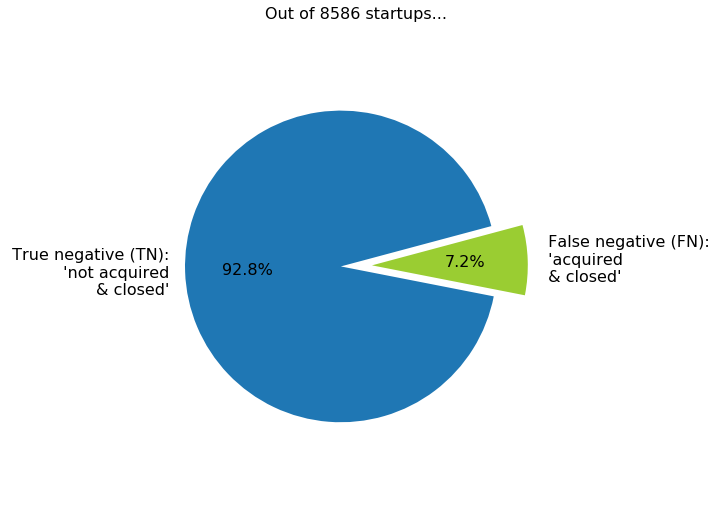

In [102]:
% matplotlib inline

fig = plt.figure(figsize=(7,7))
ax = plt.subplot(111)
ax.set_title('Out of '+str(len(df2))+' startups...', fontsize=16)
labels = ' True negative (TN):\n \'not acquired\n& closed\'', ' False negative (FN): \n \'acquired \n & closed\''
number_of_acquired_companies = len(df2[(df2['Acquisition Status']=='Was Acquired')|(df2['Acquisition Status']=='Made Acquisitions, Was Acquired')])
number_of_closed_companies = len(df2) - number_of_acquired_companies
sizes = [number_of_closed_companies, number_of_acquired_companies]
colors = ['C0', 'yellowgreen']
explode = (0.2, 0)  # explode 1st slice

# Plot pie chart
patches, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=15)

for i in range(len(texts)):
    texts[i].set_fontsize(16)
    autotexts[i].set_fontsize(16)

plt.axis('equal')
plt.subplots_adjust(top=1,bottom=0.04,left=0.1,right=0.85)
plt.savefig('Crunchbase_PieChart.jpg', dpi=600, bbox_inches='tight')
plt.show()

# Number of companies closed and acquired grouped by funding amount and their respective acquisiton percentages

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in divide
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in divide


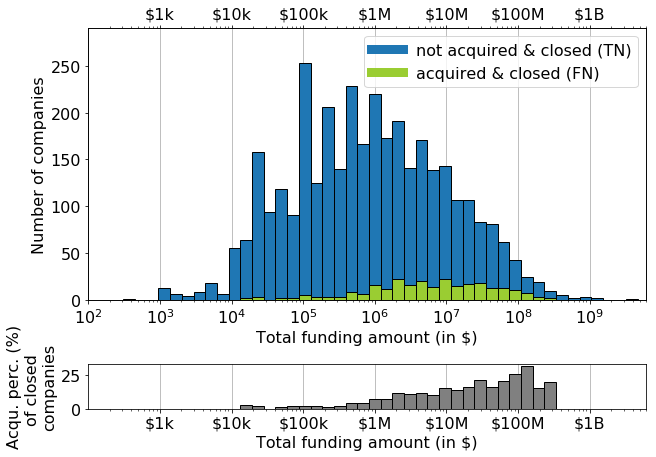

In [103]:
% matplotlib inline
font = {'family': 'normal', 'weight': 'normal', 'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(9,7))
# Gridplot with top and bottom figure
gs = gridspec.GridSpec(2, 1,  height_ratios=[6, 1])
gs.update(left=0.12, right=0.98, hspace=0.40)
ax = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[1,0])

# Define data for closed(x) and acquired (x_acquired) companies
x = pd.to_numeric(df2[(df2['Acquisition Status']!='Was Acquired')&(df2['Acquisition Status']!='Made Acquisitions, Was Acquired')]['Total Funding Amount'].dropna().values)
x_acquired = pd.to_numeric(df2[(df2['Acquisition Status']=='Was Acquired')|(df2['Acquisition Status']=='Made Acquisitions, Was Acquired')]['Total Funding Amount'].dropna().values)
# Plot top histogram
(n, bins, patches)=ax.hist(x,bins=np.logspace(2,10,50), rwidth =1,color='C0',edgecolor='black',zorder=5)
(n_acquired, bins, patches)=ax.hist(x_acquired,bins=np.logspace(2,10,50), rwidth =1,color='yellowgreen',edgecolor='black',zorder=5)
# Formatting/labelling of axes in top plot
ax.set_xscale('log')
ax.set_xlim(left=1e2, right=6e+9)
ax.set_xlabel('Total funding amount (in $)',fontsize=16)
ax.set_ylabel('Number of companies',fontsize=16)
ax.tick_params(axis='both', labelsize=16)
ax.grid(b=True, which='major', axis='x',zorder=0)
ax1 = ax.twiny()
ax1.set_xlim(ax.get_xlim())
ax1.set_xscale('log')
top_axis_ticks = np.array([1e+3,1e+4,1e+5,1e+6,1e+7,1e+8,1e+9])
top_axis_labels = np.array(['$1k','$10k','$100k','$1M','$10M','$100M','$1B'])
ax1.set_xticks(top_axis_ticks)
ax1.set_xticklabels(top_axis_labels,fontsize=16)
ax1.tick_params(axis =u'both')
ax1.set_ylim(bottom=0, top=290)
a = ax.get_xticks()

### Plot acquisition percentage in bottom plot
# l gives the bin position and l_width gives the width of each individual bin on a log scale
l = []
l_width=[]
b_0 = bins[0]
for b in bins[1:]:
    l.append((b_0+b)/2.)
    l_width.append(b-b_0)
    b_0=b
# Calculates the ratio of aquired to closed companies and removes singularities
p= 100*(n_acquired/n)
p[p == inf] = 0
# percentages are the acquisiton percentages per funding amount
percentages = np.nan_to_num(p)
# Plot bottom plot and format axes
ax2.bar(l,percentages, width=1*np.array(l_width),edgecolor='black', color='grey',zorder=5)
ax2.set_xscale('log')
ax2.set_xlim(left=1e2, right=6e+9)
ax2.set_xlabel('Total funding amount (in $)',fontsize=16)
ax2.set_ylabel('Acqu. perc. (%)\nof closed \ncompanies') #Acqu. perc. (%) \n of closed companies, Ratio FN/TN \n (%)
ax2.set_xticks(top_axis_ticks)
ax2.set_xticklabels(top_axis_labels,fontsize=16)
ax2.grid(b=True, which='major', axis='x',zorder=0)
# Add legend in top plot and set formatting
import matplotlib.lines as mlines
blue_line = mlines.Line2D([], [], color='C0', label='not acquired & closed (TN)')
green_line = mlines.Line2D([], [], color='yellowgreen', label='acquired & closed (FN)')
legend = plt.legend(handles=[blue_line, green_line])
for handle in legend.legendHandles:
    handle.set_linewidth(9.0)
plt.savefig('Crunchbase_Acquisiton_rate_by_funding.jpg', dpi=600, bbox_inches ='tight')
plt.show()

# Number of companies closed/acquired by category

#### Print information on grouping companies based on their categories at the end of the cell

In [65]:
# Print information on grouping companies based on their categories at the end of the cell
# Number of assigned and distinct categories for all companies
Number_of_assigned_categories = len(sum(df2['Category Groups']
                                        .dropna()
                                        .apply(lambda string:string.split(','))
                                        .apply(lambda List: [word.strip() for word in List])
                                        ,[]))
Number_of_distinct_categories = len(set(sum(df2['Category Groups']
                                        .dropna()
                                        .apply(lambda string:string.split(','))
                                        .apply(lambda List: [word.strip() for word in List])
                                        ,[])))
print ('The number of different categories is: {} which were assigned {} times.'
        .format(Number_of_distinct_categories, Number_of_assigned_categories))
# Number of assigned and distinct categories for unsuccesful companies
Number_of_assigned_categories_unsuccesful = len(sum(df2[(df2['Acquisition Status']!='Was Acquired')&(df2['Acquisition Status']!='Made Acquisitions, Was Acquired')]['Category Groups']
                                        .dropna()
                                        .apply(lambda string:string.split(','))
                                        .apply(lambda List: [word.strip() for word in List])
                                        ,[]))
Number_of_distinct_categories_unsuccesful = len(set(sum(df2[(df2['Acquisition Status']!='Was Acquired')&(df2['Acquisition Status']!='Made Acquisitions, Was Acquired')]['Category Groups']
                                        .dropna()
                                        .apply(lambda string:string.split(','))
                                        .apply(lambda List: [word.strip() for word in List])
                                        ,[])))
print ('The number of different categories for companies which failed is: {} which were assigned {} times.'
       .format(Number_of_distinct_categories_unsuccesful, Number_of_assigned_categories_unsuccesful))
# Number of assigned and distinct categories for succesful companies
Number_of_assigned_categories_succesful = len(sum(df2[(df2['Acquisition Status']=='Was Acquired')|(df2['Acquisition Status']=='Made Acquisitions, Was Acquired')]['Category Groups']
                                        .dropna()
                                        .apply(lambda string:string.split(','))
                                        .apply(lambda List: [word.strip() for word in List])
                                        ,[]))
Number_of_distinct_categories_succesful = len(set(sum(df2[(df2['Acquisition Status']=='Was Acquired')|(df2['Acquisition Status']=='Made Acquisitions, Was Acquired')]['Category Groups']
                                        .dropna()
                                        .apply(lambda string:string.split(','))
                                        .apply(lambda List: [word.strip() for word in List])
                                        ,[])))
print ('The number of different categories for companies which succeded is: {} which were assigned {} times.'
       .format(Number_of_distinct_categories_succesful, Number_of_assigned_categories_succesful))

The number of different categories is: 46 which were assigned 24727 times.
The number of different categories for companies which failed is: 46 which were assigned 22891 times.
The number of different categories for companies which succeded is: 45 which were assigned 1836 times.


#### Print the sorted word counts for categories in closed and acquired companies at the end of the cell

In [66]:
# List of categories for unsuccesful companies
l_unsuccesful = sum(df2[(df2['Acquisition Status']!='Was Acquired')|(df2['Acquisition Status']!='Made Acquisitions, Was Acquired')]['Category Groups']
                    .dropna()
                    .apply(lambda string:string.split(','))
                    .apply(lambda List: [word.strip() for word in List])
                    ,[])

# operator is used for sorting a list of dictionaries
import operator
# print the word frequency 
word_counts_unsuccesful = {}
for word in list(set(l_unsuccesful)):
    word_counts_unsuccesful[word] = l_unsuccesful.count(word)
sorted_word_counts_unsuccesful = sorted(word_counts_unsuccesful.items(), key=operator.itemgetter(1), reverse=True)
sorted_word_counts_unsuccesful[:]

# List of categories for succesful companies
l_succesful = sum(df2[(df2['Acquisition Status']=='Was Acquired')|(df2['Acquisition Status']=='Made Acquisitions, Was Acquired')]['Category Groups']
                    .dropna()
                    .apply(lambda string:string.split(','))
                    .apply(lambda List: [word.strip() for word in List])
                    ,[])

# operator is used for sorting a list of dictionaries
import operator
# print the word frequency 
word_counts_succesful = {}
for word in list(set(l_succesful)):
    word_counts_succesful[word] = l_succesful.count(word)
sorted_word_counts_succesful = sorted(word_counts_succesful.items(), key=operator.itemgetter(1), reverse=True)
# print sorted_word_counts_succesful[:];
# print sorted_word_counts_unsuccesful[:];

# Make a dataframe of category counts for companies that were succesful or unsuccesful in that category
left = pd.DataFrame(np.array(sorted_word_counts_unsuccesful), columns=['Category', 'Counts_unsuccesful'])
right = pd.DataFrame(np.array(sorted_word_counts_succesful), columns=['Category', 'Counts_succesful'])
result = pd.merge(left,right, how='outer').fillna(0)
result

,Category,Counts_unsuccesful,Counts_succesful
0,Software,3033,246
1,Internet Services,2617,177
2,Media and Entertainment,1837,134
3,Mobile,1254,103
4,Commerce and Shopping,1238,61
5,Information Technology,1230,115
6,Sales and Marketing,1014,65
7,Hardware,926,88
8,Apps,710,53
9,Data and Analytics,706,68


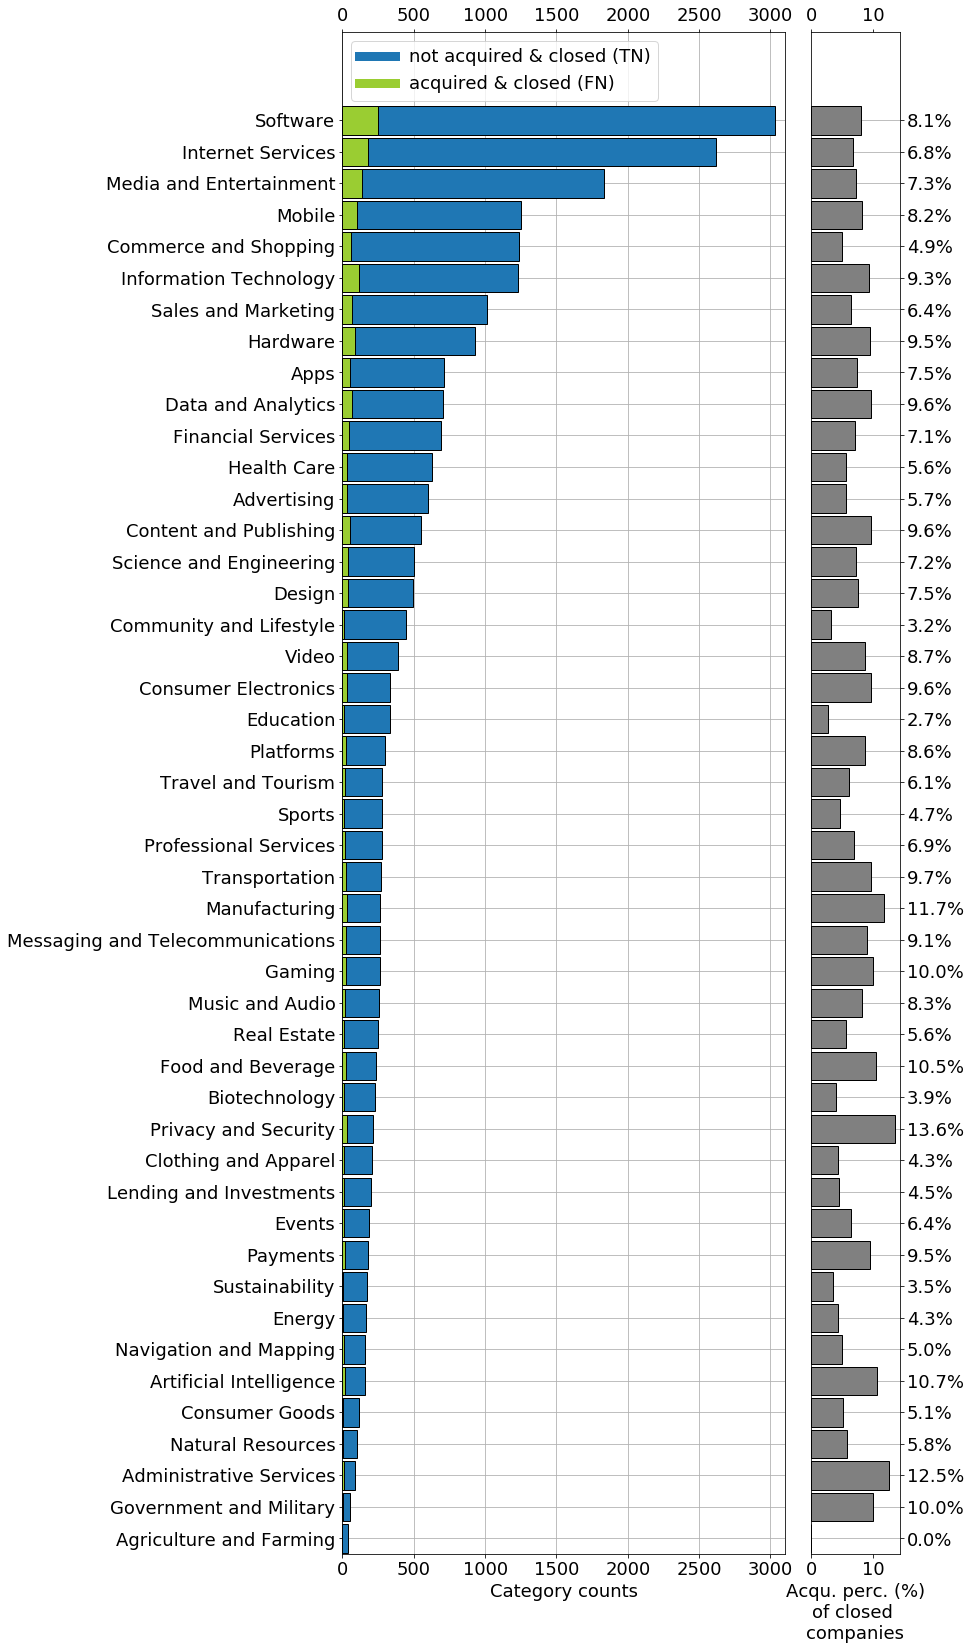

In [68]:
% matplotlib inline
font = {'family': 'normal', 'weight': 'normal', 'size': 18}
plt.rc('font', **font)

fig = plt.figure(figsize=(9,28))
# Gridplot with 2 columns
gs = gridspec.GridSpec(1, 2,  width_ratios=[5, 1])
gs.update(left=0.12, right=0.98, wspace=0.1)
# Left plot
ax1 = plt.subplot(gs[0,0])
# Data
y,x_succesful= result['Category'], pd.to_numeric(result['Counts_succesful'])
y,x_unsuccesful= result['Category'], pd.to_numeric(result['Counts_unsuccesful'])
y_axis = np.arange(0, len(result['Category']), 1)[::-1]
# Plot left figure
bars = ax1.barh(y_axis, x_unsuccesful, height=0.9, align='center',zorder=3, edgecolor='black')
bars = ax1.barh(y_axis, x_succesful, height=0.9, align='center',zorder=3, color='yellowgreen', edgecolor='black')
# Format and label left figure
ax1.set_yticks(y_axis)
ax1.set_yticklabels(y)
ax1.set_ylim(bottom = -0.5,top = 47.8)
ax1.tick_params(axis='y', which='major', bottom=False)
ax1.xaxis.set_tick_params(labeltop='on', top='on')
ax1.set_xlim(left=-0.1, right=3100)
ax1.set_xlabel('Category counts')
ax1.yaxis.grid(True,zorder=0)
ax1.xaxis.grid(True,zorder=0)
# Plot legend
import matplotlib.lines as mlines
blue_line = mlines.Line2D([], [], color='C0', label='not acquired & closed (TN)')
green_line = mlines.Line2D([], [], color='yellowgreen', label='acquired & closed (FN)')
legend = plt.legend(handles=[blue_line, green_line], loc='upper left')
for handle in legend.legendHandles:
    handle.set_linewidth(9.0)
# Define data for right figure
ax2 = plt.subplot(gs[0,1])
y,x_succesful= result['Category'], pd.to_numeric(result['Counts_succesful'], downcast='float')
y,x_unsuccesful= result['Category'], pd.to_numeric(result['Counts_unsuccesful'], downcast='float')
percentages = 100*(x_succesful/x_unsuccesful)
ax2.set_yticks(y_axis)
ax2.set_yticklabels(['{}%'.format(round(float(per),1)) for per in percentages])
ax2.set_ylim(bottom = -0.5,top = 47.8)
# Plot right figure and format axis
bars = ax2.barh(y_axis, 100*(x_succesful/x_unsuccesful), height=0.9, align='center',zorder=3,  color='grey', edgecolor='black')
ax2.set_xlabel('Acqu. perc. (%)\nof closed \ncompanies')
ax2.xaxis.set_tick_params(labelright='on', right='on')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.yaxis.grid(True,zorder=0)
plt.savefig('Crunchbase_Acquisiton_rate_by_category.jpg', dpi=600, bbox_inches ='tight')
plt.show()

# Acquisition percentage by startup lifetime

In [93]:
def to_year(s):
    '''
    Input: s: string in format of 1998, Aug-98 or any month
    Output: year or 0 if year not given
    '''
    try:
        return int(s[-4:])
    except ValueError:
        try:
            if int(s[-2:])<30:
                 return int('20'+s[-2:])
            elif int(s[-2:])>29:
                 return int('19'+s[-2:])
        except ValueError:
            return 0
# df2['Founded Date'].fillna('0000').apply(lambda s:  to_year(s))

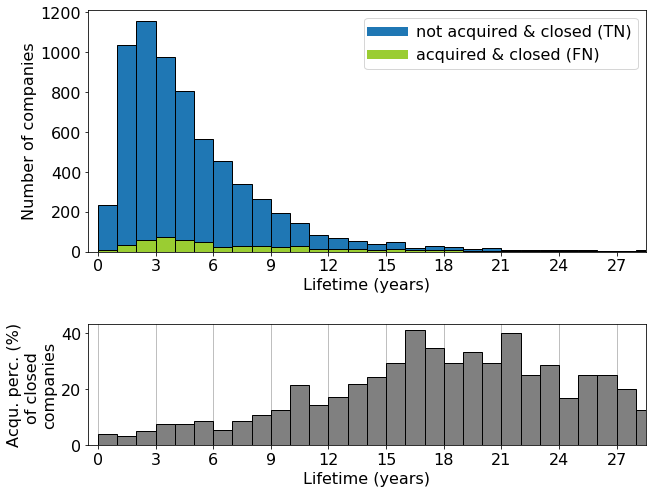

In [100]:
# Calculate the lifetime of each ccompany based on their founding and closing date
df2['Founded Year'] = df2['Founded Date'].fillna('0000').apply(lambda s: to_year(s))
df2['Lifetime'] = df2['Closed Date Year'] - df2['Founded Year']

% matplotlib inline
font = {'family': 'normal', 'weight': 'normal', 'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(9,8))
# Gridplot with top and bottom figure
gs = gridspec.GridSpec(2, 1,  height_ratios=[3, 1.5])
gs.update(left=0.12, right=0.98, hspace=0.40)
ax = plt.subplot(gs[0,0])
# Define data for closed(t) and acquired (t_acq) companies
t = pd.to_numeric(df2[(df2['Acquisition Status']!='Was Acquired')&(df2['Acquisition Status']!='Made Acquisitions, Was Acquired')&(df2['Lifetime'] <50)]['Lifetime'].dropna().values)
t_acq = pd.to_numeric(df2[(df2['Acquisition Status']=='Was Acquired')|(df2['Acquisition Status']=='Made Acquisitions, Was Acquired')&(df2['Lifetime'] <50)]['Lifetime'].dropna().values)
t_max = 30
# Plot data and format axes
(n, bins, patches)=ax.hist(t, bins=np.array(range(t_max)), rwidth =1,edgecolor='black',zorder=5)
(n_acq, bins, patches)=ax.hist(t_acq, bins=np.array(range(t_max)), rwidth =1,edgecolor='black', color='yellowgreen',zorder=5)
ax.set_xlim(left=-0.5, right=t_max-1.5)
ax.set_xlabel('Lifetime (years)',fontsize=16)
ax.set_ylabel('Number of companies',fontsize=16)
ax.tick_params(axis='both', labelsize=16)
ax.set_xticks(np.arange(0,t_max,3))

# Add legend in top plot
import matplotlib.lines as mlines
blue_line = mlines.Line2D([], [], color='C0', label='not acquired & closed (TN)')
green_line = mlines.Line2D([], [], color='yellowgreen', label='acquired & closed (FN)')
legend = plt.legend(handles=[blue_line, green_line])
for handle in legend.legendHandles:
    handle.set_linewidth(9.0)

ax1 = plt.subplot(gs[1,0])
# l gives the bin position and l_width gives the width of each individual bin
l = []
l_width=[]
b_0 = bins[0]
for b in bins[1:]:
    l.append((b_0+b)/2.)
    l_width.append(b-b_0)
    b_0=b

### Plot acquisition percentage in bottom plot    
# calculates the ratio of aquired to closed companies and removes singularities
p= 100*(n_acq/n)
p[p == inf] = 0
# percentages are the acquisiton percentages lifetime year
percentages = np.nan_to_num(p)
# Plot bottom figure
ax1.bar(l,percentages, width=1*np.array(l_width),edgecolor='black', color='grey',zorder=5)
ax1.set_ylabel('Acqu. perc. (%)\nof closed \ncompanies')
ax1.grid(b=True, which='major', axis='x',zorder=0)
ax1.tick_params(axis='both', labelsize=16)
ax1.set_xticks(np.arange(0,t_max,3))
ax1.set_xlim(left=-0.5, right=t_max-1.5)
ax1.set_xlabel('Lifetime (years)',fontsize=16)
plt.savefig('Crunchbase_Lifetime.jpg', dpi=600, bbox_inches ='tight')
plt.show()

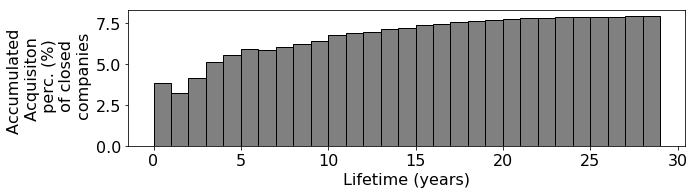

In [101]:
% matplotlib inline
font = {'family': 'normal', 'weight': 'normal', 'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(9,6))
# Gridplot with top and bottom figure
gs = gridspec.GridSpec(2, 1,  height_ratios=[1, 1])
gs.update(left=0.12, right=0.98, hspace=0.40)
ax = plt.subplot(gs[0,0])
# calculates the ratio of cumulative_aquired to cumulative_closed companies and removes singularities
p_cum= 100*(np.cumsum(n_acq)/np.cumsum(n))
p_cum[p_cum == inf] = 0
# percentages are the acquisiton percentages lifetime year
cum_percentages = np.nan_to_num(p_cum)
ax.bar(l,cum_percentages, width=1*np.array(l_width),edgecolor='black', color='grey',zorder=5)
ax.set_ylabel('Accumulated \n Acquisiton \n perc. (%)\n of closed\n companies')
ax1.set_xlim(left=-0.5, right=t_max-1.5)
ax.set_xlabel('Lifetime (years)',fontsize=16)
plt.savefig('Crunchbase_acumulated_acquisition_percentage.jpg', dpi=600, bbox_inches ='tight')
plt.show()